# imports

In [1]:
%run read_matlab_file.ipynb
%run LC_calibration.ipynb

read_matlab_file.ipynb loaded successfully!
read_matlab_file.ipynb loaded successfully!
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!
read_matlab_file.ipynb loaded successfully!
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!
(14610, 9)
(14610, 9)
safety_time.ipynb loaded successfully!
187 valleys removed
erg converted to keV
df sorted by adr and tus
safety time events flagged. Found 287 flags
(24587, 11)
116 valleys removed
erg converted to keV
df sorted by adr and tus
safety time events flagged. Found 187 flags
(14494, 11)
(187, 11)
LC_calibration loaded successfully!


# XPEC data preperation

### TODO
    - Extract the bins from the txt file. DONE
    
    - Bin the keV into the predefined bins. DONE
    
    - Implement function for T0 & tus correction (ToF). DONE
        --> COMMENT: still 300ms error after calibrating GRB190206
        
    -Do all the steps above for GRB200415A and cross check results. DONE
    
    - Implement function for cutting the tus & keV array at time interval given by Anastasia or GCN report 
        ---> NEXT UP
 
    - make sure the T0 are correctly clibrated. Send complete list to Andrey for validation
    
    
### Notes
    -Assuming 
    -bins_keV are the right most edges! 
    -Anders have filtered for keV >=500 
    -Implementation is ok. Proceed to wrapping a function around it.
    --> have a shift variable as input (have to do with lining up the LC from the different spacecrafts)
    
    
### Problems
    -GRB200415: Problem lining up the T0 from my data to the data that Anders used to histogram the data for 0.8ms <=tus <= 3.2ms
    Since the data is shifted a small amount the number of counts in the bins don't match up correctly.
    --> Absolute time correction is neccecary, but this value might be different from the one Anders used.
    -->Error of 4151.099 ... us (4.1 ms) from df_A and my df.
 
    
    -GRB200415: The binning does not produce the same bin counts in Ander´s df_A and the df_check
    --> Because of filtering for keV's >= 500
    
    

In [2]:
#time of flight from KW to ASIM. Given in seconds
ToF = {"GRB180720":-4.2377,"GRB181222":2.8716, "GRB190206":4.9225, "GRB190305":3.4460,
      "GRB190606":4.0316,"GRB200415":4.1840,"GRB200521":-0.6226,"GRB200716":3.0155,
      "GRB201227":0.7142, "GRB210424":-0.5033, "GRB210619":-2.6183}

In [3]:
def ToF_correction(grb_id=None):
    ToF_us = ToF[grb_id]*1e6
    df,T0 = complete_df(grb_id=grb_id)
    df["tus"], T0_calibrated = df["tus"] - ToF_us, T0 - timedelta(microseconds=ToF_us) #calibrating 
    return df,T0,T0_calibrated

In [4]:
df,T0 = complete_df(grb_id="GRB200415")

116 valleys removed
erg converted to keV
df sorted by adr and tus
safety time events flagged. Found 187 flags


In [5]:
print(T0)
T1 = T0 - timedelta(microseconds=4.9225*1e6)
print(T1)

2020-04-15 08:48:05.561000
2020-04-15 08:48:00.638500


# bin control

In [6]:
df_bin = pd.read_csv("/Users/andreas/phys/master/GRB/spectral_analysis/HED_binedges.txt")

In [99]:
df_bin.head()

,energy_bin_start_keV,energy_bin_stop_keV
0,10.00000,12.58925
1,12.58925,15.84893
2,15.84893,19.95262
3,19.95262,25.11886
4,25.11886,31.62278


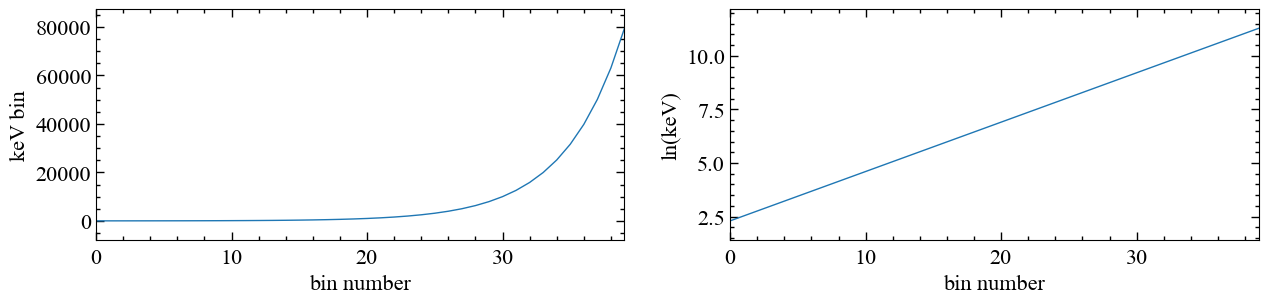

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3))

ax1.plot((df_bin["energy_bin_start_keV"]))
ax2.plot(np.log(df_bin["energy_bin_start_keV"]))
ax1.set_xlabel("bin number")
ax1.set_ylabel("keV bin")
ax2.set_xlabel("bin number")
ax2.set_ylabel("ln(keV)")
plt.show()

In [100]:
start = df_bin["energy_bin_start_keV"].to_numpy()
#start = np.append(0,start)
end = df_bin["energy_bin_stop_keV"].to_numpy()
bins=np.append(start,end[-1])
print(len(bins))
bins

41


array([1.000000e+01, 1.258925e+01, 1.584893e+01, 1.995262e+01,
       2.511886e+01, 3.162278e+01, 3.981072e+01, 5.011872e+01,
       6.309573e+01, 7.943282e+01, 1.000000e+02, 1.258925e+02,
       1.584893e+02, 1.995262e+02, 2.511886e+02, 3.162278e+02,
       3.981072e+02, 5.011872e+02, 6.309573e+02, 7.943282e+02,
       1.000000e+03, 1.258925e+03, 1.584893e+03, 1.995262e+03,
       2.511886e+03, 3.162278e+03, 3.981072e+03, 5.011872e+03,
       6.309573e+03, 7.943282e+03, 1.000000e+04, 1.258925e+04,
       1.584893e+04, 1.995262e+04, 2.511886e+04, 3.162278e+04,
       3.981072e+04, 5.011872e+04, 6.309573e+04, 7.943282e+04,
       1.000000e+05])

In [101]:
df_hist_check = pd.read_csv("/Users/andreas/phys/master/GRB/spectral_analysis/HED_(0.8 ms to 3.2 ms).txt")
print("Num hist counts totoal: ", sum(df_hist_check["counts"].to_numpy()[1:]))
print("bins_keV are the right most edge")

df_hist_check.head()

Num hist counts totoal:  300.0
bins_keV are the right most edge


,bins_keV,counts,poisson_error_counts,duration_seconds
0,10.00000,-9999.0,-9999.0,-9999.0000
1,12.58925,0.0,0.0,0.0024
2,15.84893,0.0,0.0,0.0024
3,19.95262,0.0,0.0,0.0024
4,25.11886,0.0,0.0,0.0024


# keV bin function

In [ ]:
def keV_bin(df=None,time_interval=None,keV_interval=None,keV_bins=None):
    '''
    NOTE: working with ms resolution for the tus array
    
    input: df <pd.dataframe> complete dataframe with no flagged events
    time_interval <tuple> start and end (ms) of the time interval for the keV binning.
    keV_interval <tuple> default is None. Meaning the whole spectrum
    
    return: <pd.dataframe> with the bin_counts and bin_edges as a dataframe
    '''
    df.sort_values(by=['tus'],inplace=True) #first sorting by tus in increasing order
    
    
    #tus handling-------------------------------------------
    tus_arr = df["tus"].to_numpy()
    tus_arr = tus/1e3 #converting to ms resolution
    
    if time_interval==None:
        tus_start,tus_end = min(tus_arr),max(tus_arr)
        
    tus_start,tus_end = time_interval[0],time_interval[1] #selecting the interval
    idx_start = find_nearest(tus_arr,tus_start) #starting index
    idx_end = find_nearest(tus_arr,tus_end) + 1 #ending index. Adding one index for including that count

    tus_arr = tus_arr[start:end] #selecting the interval for tus
    
    
    #keV handling-------------------------------------------
    
    keV_arr = df["keV"].to_numpy()
    if keV_interval==None:
         keV_lower,keV_upper = 0,1e16 #selecting artificially high bounds
    else: 
        keV_lower,keV_upper = keV_interval[0],keV_interval[1] #selecting the bounds for the keV's
    keV_arr = keV_arr[start:end] #selecting keV's on the given tus interval

    ii = []
    for i,k in enumerate(keV_arr): #finding
        if k<=400:
            ii.append(i)

    tus_flag = tus[ii]
    kev_flag = keV_A[ii]

    
    
    
    
    
    

# handling dataframes

In [97]:

df_A = pd.read_csv("/Users/andreas/phys/master//GRB/safety_time/new_safety_time.csv",sep=",")
df_A = df_A.rename(columns={"kev":"keV"}) 
df_A = df_A.sort_values(by=['tus'])

flag_label = []
for i,row in df_A.iterrows():
    if row["remove_VD"]==True:
        flag_label.append(i)
    elif row["typ"] == 3:
        flag_label.append(i)
        
df_A.drop(labels=flag_label,inplace=True)

6523 7227
704
33


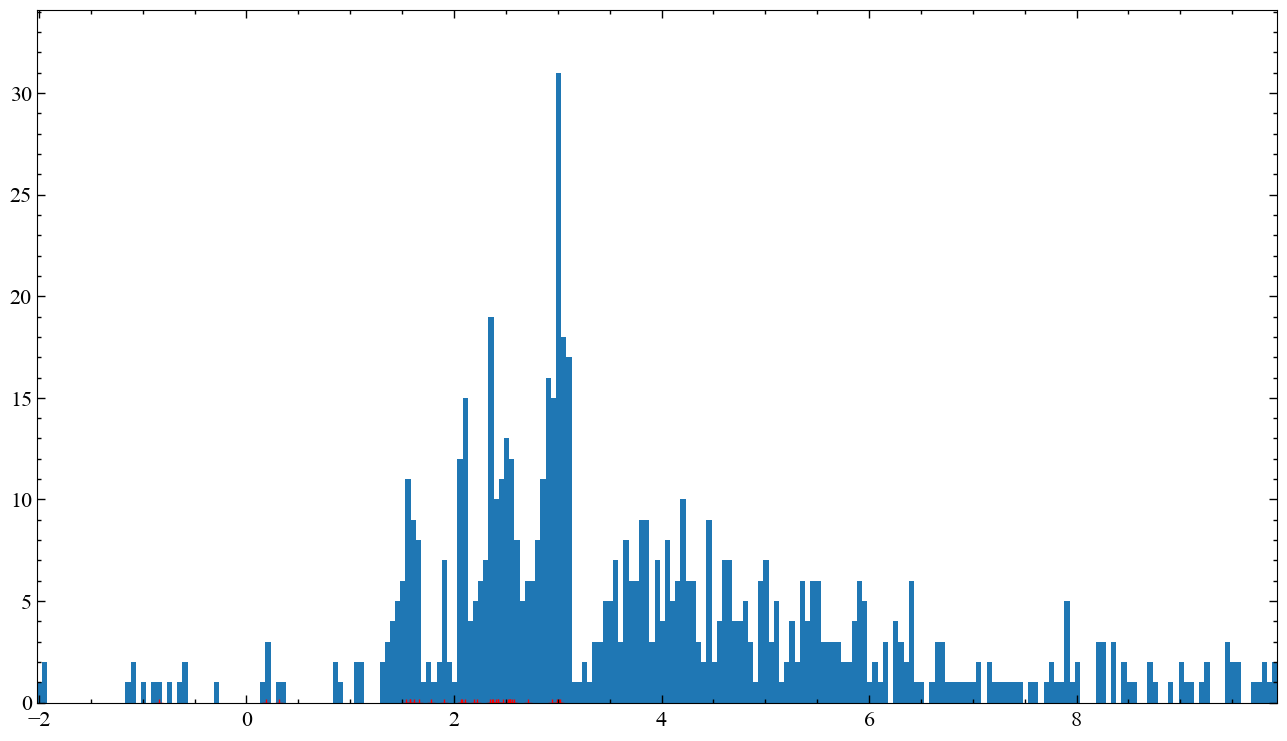

In [98]:
tus = df_A["tus"].to_numpy()
tus = tus/1e3

idx_start_A = find_nearest(tus,0.8)
idx_end_A = find_nearest(tus,3.2)

start = find_nearest(tus,-2)
end = find_nearest(tus,10)
print(start,end)

tus = tus[start:end]

keV_A = df_A["keV"].to_numpy()
keV_A = keV_A[idx_start_A:idx_end_A]
ii = []
for i,k in enumerate(keV_A):
    if k<=400:
        ii.append(i)
        
tus_flag = tus[ii]
kev_flag = keV_A[ii]

fig, ax = plt.subplots(1,1,figsize=(16,9))

ax.hist(tus,np.arange(min(tus),max(tus)+0.05,0.05))
ax.scatter(x=tus_flag,y=[0]*len(tus_flag),marker="+",c="r")
plt.show()

In [95]:
bins

array([1.000000e+01, 1.258925e+01, 1.584893e+01, 1.995262e+01,
       2.511886e+01, 3.162278e+01, 3.981072e+01, 5.011872e+01,
       6.309573e+01, 7.943282e+01, 1.000000e+02, 1.258925e+02,
       1.584893e+02, 1.995262e+02, 2.511886e+02, 3.162278e+02,
       3.981072e+02, 5.011872e+02, 6.309573e+02, 7.943282e+02,
       1.000000e+03, 1.258925e+03, 1.584893e+03, 1.995262e+03,
       2.511886e+03, 3.162278e+03, 3.981072e+03, 5.011872e+03,
       6.309573e+03, 7.943282e+03, 1.000000e+04, 1.258925e+04,
       1.584893e+04, 1.995262e+04, 2.511886e+04, 3.162278e+04,
       3.981072e+04, 5.011872e+04, 6.309573e+04, 7.943282e+04,
       1.000000e+05])

In [94]:
hist,edges = np.histogram(keV_A,bins)
hist = np.append(-9999,hist)
df_hist_A = pd.DataFrame({"check counts":df_hist_check['counts'], "counts":hist,"check bins":df_hist_check['bins_keV'],"edges":edges})
df_hist_A

,check counts,counts,check bins,edges
0,-9999.0,-9999,10.00000,10.00000
1,0.0,0,12.58925,12.58925
2,0.0,0,15.84893,15.84893
3,0.0,0,19.95262,19.95262
4,0.0,0,25.11886,25.11886
5,0.0,0,31.62278,31.62278
6,0.0,0,39.81072,39.81072
7,0.0,0,50.11872,50.11872
8,0.0,0,63.09573,63.09573
9,0.0,0,79.43282,79.43282


In [29]:
df,T0 = complete_df(grb_id="GRB200415")
df.sort_values(by=["tus"],inplace=True)
tus = df["tus"].to_numpy()
tus = tus/1e3-28.5


116 valleys removed
erg converted to keV
df sorted by adr and tus
safety time events flagged. Found 187 flags


6588 7327
739


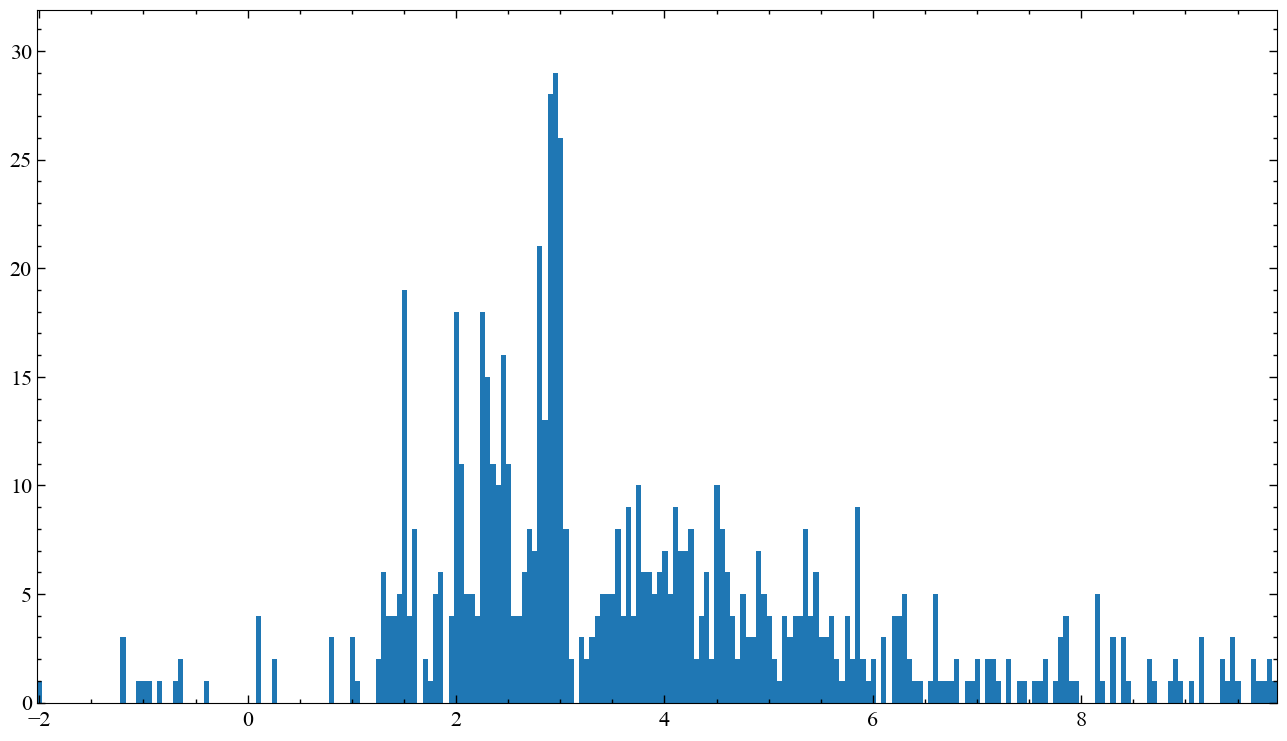

In [30]:

start = find_nearest(tus,-2)
end = find_nearest(tus,10)
print(start,end)

tus = tus[start:end]
print(len(tus))

fig, ax = plt.subplots(1,1,figsize=(16,9))

ax.hist(tus,np.arange(min(tus),max(tus)+0.05,0.05))
plt.show()

In [ ]:
#df_A = pd.read_csv("/Home/siv30/wad005/master/GRB/safety_time/HED_GRB200415_inc_valley_ST.csv",sep=",") #UIB
df_A = pd.read_csv("/Users/andreas/phys/master//GRB/safety_time/new_safety_time.csv",sep=",")
df_A = df_A.rename(columns={"kev":"keV"}) 
df_A = df_A.sort_values(by=['adr','tus'])
print(df_A.shape)

st_list = get_st(df_A)
df_A["st"] = st_list
dt_list = get_dt(df_A)
df_A["dt"] = dt_list
flag_list = get_flag(df_A)
df_A["flag"] = flag_list
df_A = df_A.drop(columns=["cal_abc"])


#dropping flags
labels_A=[]
for index,row in df_A.iterrows():
    if row["flag"] == True:
        labels_A.append(index)
df_A.drop(labels=labels_A,inplace=True)


print(df_A.shape)
df_A.sort_values(by=['tus'],inplace=True)
tus_A,keV_A = df_A['tus'].to_numpy(), df_A["keV"].to_numpy()


idx = []
for i,tus in enumerate(tus_A):
    if 0.8<=tus/1e3<=3.2:
        idx.append(i)
            
tus_A = tus_A[idx]
keV_A = keV_A[idx]
print(len(tus_A),len(keV_A))

df_A = df_A.iloc[idx]
df_A.head()

In [ ]:
#check if there are any valleys
#--> no valleys in df_A
typ = df_A["typ"].to_numpy()
if 3 in typ:
    print(True)
else:
    print(False)

In [ ]:
hist_A, edges_A = np.histogram(keV_A,bins)

if hist_A[0] == 0:
    hist_A[0] = -9999
    
df_hist_check["bin_counts_A"] = hist_A
df_hist_check["edges_A"] = edges_A

df_hist_check[['bins_keV',"counts","edges_A","bin_counts_A"]]


df,T0 = complete_df(grb_id="GRB200415")
print(df.shape)

labels=[]
for index,row in df.iterrows():
    if row["flag"] == True:
        labels.append(index)
df.drop(labels=labels,inplace=True)


df.sort_values(by=['tus'],inplace=True)
print("first tus ", df["tus"].to_numpy()[0])
df = df.drop(columns=["cal_abc"])
print(df.shape)
df["tus"] = df["tus"].to_numpy()+4151.099999999977

tus_test = df["tus"].to_numpy()
keV_test = df["keV"].to_numpy()

idx_test = []
for i,tus in enumerate(tus_test):
    if 0.8<=tus/1e3<=3.2:
        idx_test.append(i)
            
tus_test = tus_test[idx_test]
keV_test = keV_test[idx_test]
print(len(tus_test),len(keV_test))
df = df.iloc[idx_test]

In [ ]:
#Need to find the appropriate cut for the peak of GRB200415

df,T0 = complete_df(grb_id="GRB200415")

In [ ]:
tus = df["tus"].to_numpy()/1e3



plt.hist(tus,bins=np.arange(min(tus), max(tus)+2,2),histtype='step')
plt.show()

# binning keV
    -Binning the keV array for 0.8 <= tus <= 3.2 

In [ ]:
-1.84+(3.2-0.8)

In [ ]:
-1.95+2.4

In [ ]:
df,T0 = complete_df(grb_id="GRB200415")

label_tus=[]
for label,row in df.iterrows():
    tus = row["tus"]/1e3
    if -1.84<=tus<=0.56: #between
        if row["flag"] == False:
            label_tus.append(label)
        
df_tus = df.iloc[label_tus]

In [ ]:
keV = df_tus["keV"].to_numpy()

hist,edges = np.histogram(keV,bins)
df_keV = pd.DataFrame({"bin_keV":hist,"edges":edges[1:]})

In [ ]:
#function for handling

#input time shift=cons, start=tus, end=tus